Example 2: Decision Trees
In this example we experiment with Decision Trees

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn import datasets

In [2]:
# define function for creating & plotting 2-class synthetic data set
def generate_2class_data(class1Mean, class1Cov, class2Mean, class2Cov, plot=True):
    
    np.random.seed(1)
    class1x = np.random.multivariate_normal(class1Mean, class1Cov, 100)
    class1y = np.zeros(100)
    class2x = np.random.multivariate_normal(class2Mean, class2Cov, 100)
    class2y = np.ones(100)
    
    X = np.concatenate((class1x, class2x), axis=0)
    y = np.concatenate((class1y, class2y))

    # Plotting the 2-class data
    if(plot):
        plt.title('Plotting 2-dimensional 2-class data')
        plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 0')
        plt.scatter(class2x[:,0], class2x[:,1], color = 'r', label = 'Class 1')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()
        
    return X,y

In [3]:
# define function for creating & plotting 3-class synthetic data set
def generate_3class_data(class1Mean, class1Cov, class2Mean, class2Cov, class3Mean, class3Cov, plot=True):
    
    np.random.seed(1)
    class1x = np.random.multivariate_normal(class1Mean, class1Cov, 100)
    class1y = np.zeros(100)
    class2x = np.random.multivariate_normal(class2Mean, class2Cov, 100)
    class2y = np.ones(100)
    class3x = np.random.multivariate_normal(class3Mean, class3Cov, 100)
    class3y = np.ones(100)
    class3y.fill(2)
    X = np.concatenate((class1x, class2x, class3x), axis=0)
    y = np.concatenate((class1y, class2y, class3y))

    # Plotting the 2-class data
    if(plot):
        plt.title('Plotting 2-dimensional 3-class data')
        plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 0')
        plt.scatter(class2x[:,0], class2x[:,1], color = 'r', label = 'Class 1')
        plt.scatter(class3x[:,0], class3x[:,1], color = 'g', label = 'Class 2')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()
    
    return X,y

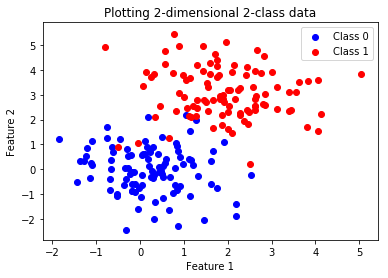

In [4]:
# first data set - 2-class normally distributed data
class1Mean = [0, 0]
class2Mean = [2, 3]

class1Cov = [[1, 0], [0, 1]]
class2Cov = [[1, 0], [0, 1]]

X, y = generate_2class_data( class1Mean, class1Cov, class2Mean, class2Cov)

In [5]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
clf.predict([[3,2]])

array([1.])

Text(0.5, 1.0, 'Decision Trees')

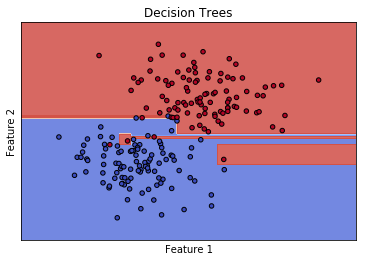

In [6]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, tr, **params):
    if tr == True:
        Z = clf.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    else:  
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# plotting decision surface

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.gca()
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

plot_contours(ax, clf, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decision Trees')

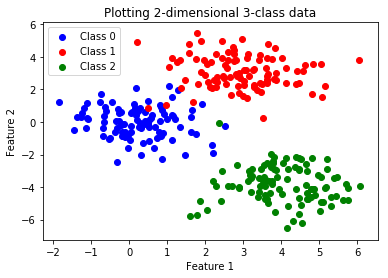

In [7]:
# second data set - 3-class normally distributed data
class1Mean = [0, 0]
class2Mean = [3, 3]
class3Mean = [4, -4]

class1Cov = [[1, 0], [0, 1]]
class2Cov = [[1, 0], [0, 1]]
class3Cov = [[1, 0], [0, 1]]

X, y = generate_3class_data( class1Mean, class1Cov, class2Mean, class2Cov, class3Mean, class3Cov)

In [8]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Text(0.5, 1.0, 'Decision Trees')

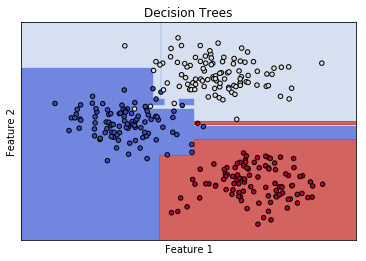

In [9]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, tr, **params):
    if tr == True:
        Z = clf.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    else:  
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# plotting decision surface

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.gca()
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

plot_contours(ax, clf, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decision Trees')

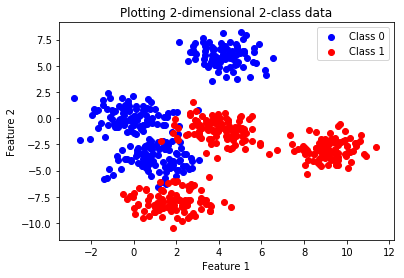

In [10]:
# third data set - mixture of Gaussians
class1G1Mean = [4, 6]
class1G2Mean = [0, 0]
class1G3Mean = [1, -4]
class1G1Cov = [[1, 0], [0,1]]
class1G2Cov = [[1, 0], [0,1]]
class1G3Cov = [[1, 0], [0,1]]

class2G1Mean = [4, -1]
class2G2Mean = [9, -3]
class2G3Mean = [2, -8]
class2G1Cov = [[1, 0], [0,1]]
class2G2Cov = [[1, 0], [0,1]]
class2G3Cov = [[1, 0], [0,1]]

np.random.seed(1)
class1G1x = np.random.multivariate_normal(class1G1Mean, class1G1Cov, 100)
class1G2x = np.random.multivariate_normal(class1G2Mean, class1G2Cov, 100)
class1G3x = np.random.multivariate_normal(class1G3Mean, class1G3Cov, 100)
class1y = np.zeros(300)
class2G1x = np.random.multivariate_normal(class2G1Mean, class2G1Cov, 100)
class2G2x = np.random.multivariate_normal(class2G2Mean, class2G2Cov, 100)
class2G3x = np.random.multivariate_normal(class2G3Mean, class2G3Cov, 100)
class2y = np.ones(300)

class1x = np.concatenate((class1G1x, class1G2x, class1G3x), axis = 0)
class2x = np.concatenate((class2G1x, class2G2x, class2G3x), axis = 0)

X = np.concatenate((class1x, class2x), axis=0)
y = np.concatenate((class1y, class2y))

# Plotting the 2-class data

plt.title('Plotting 2-dimensional 2-class data')
plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 0')
plt.scatter(class2x[:,0], class2x[:,1], color = 'r', label = 'Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [11]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=5)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Text(0.5, 1.0, 'Decision Trees')

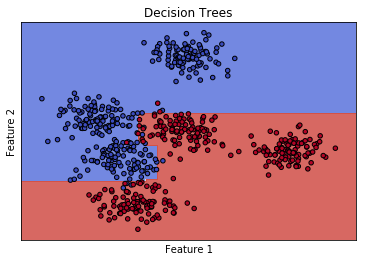

In [12]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, tr, **params):
    if tr == True:
        Z = clf.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    else:  
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# plotting decision surface

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.gca()
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

plot_contours(ax, clf, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decision Trees')

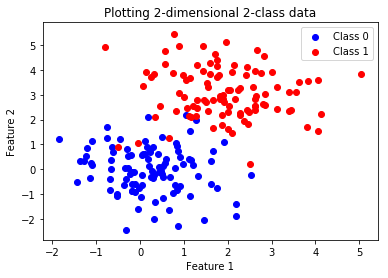

In [13]:
# first data set - 2-class normally distributed data
class1Mean = [0, 0]
class2Mean = [2, 3]

class1Cov = [[1, 0], [0, 1]]
class2Cov = [[1, 0], [0, 1]]

X, y = generate_2class_data( class1Mean, class1Cov, class2Mean, class2Cov)

In [14]:
clf1 = tree.DecisionTreeClassifier()
clf1.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
clf2 = tree.DecisionTreeClassifier(min_samples_split=15)
clf2.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

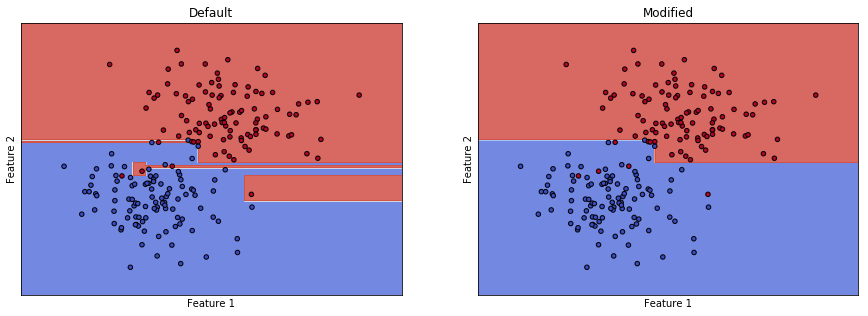

In [16]:
# plotting decision surface

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

#ax = plt.gca()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

plot_contours(ax1, clf1, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Default')

plot_contours(ax2, clf2, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Modified')

plt.show()

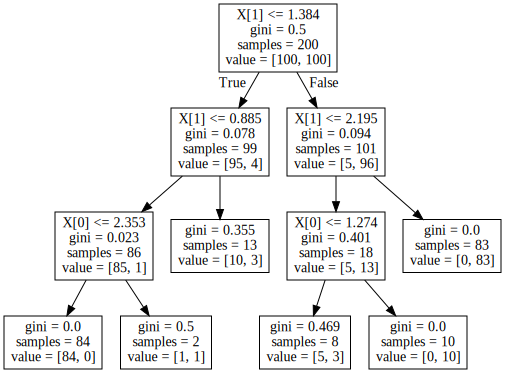

In [17]:
dot_data = tree.export_graphviz(clf2, out_file=None) 
graph = graphviz.Source(dot_data)
graph

In [18]:
# fourth data set - iris data set

# loading iris dataset
iris = datasets.load_iris()

clf1 = tree.DecisionTreeClassifier()
clf1.fit(iris.data, iris.target)




DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

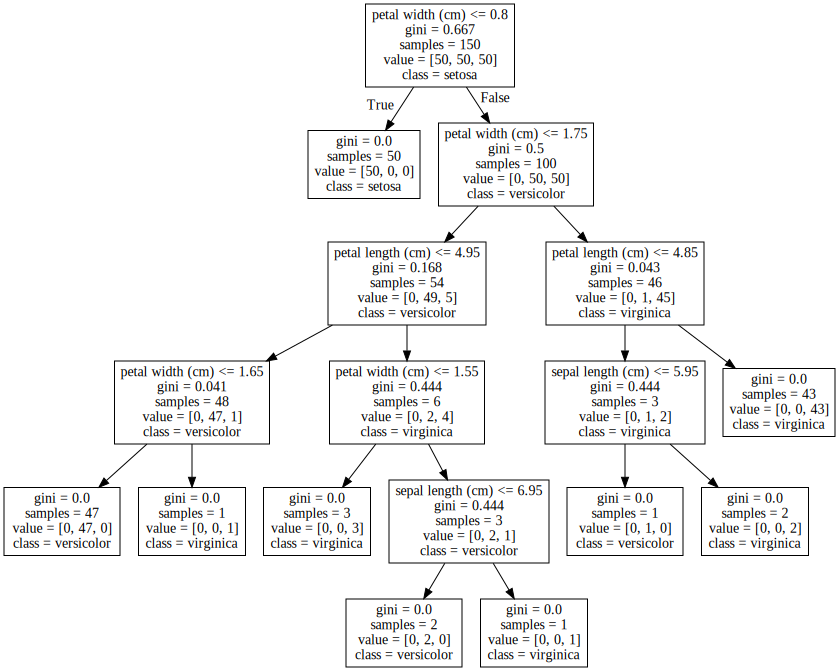

In [19]:
dot_data = tree.export_graphviz(clf1, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names) 
graph = graphviz.Source(dot_data)
graph

In [20]:
dataset = np.array([[11.7,183.2,0],
           [12.8,187.6,0],
           [15.3,177.4,0],
           [13.9,198.6,0],
           [17.2,175.3,0],
           [16.8,151.1,1],
           [17.5,171.4,1],
           [23.6,162.8,1],
           [16.9,179.5,1],
           [19.1,173.8,1]])
X = dataset[:,:-1]
Y = dataset[:,-1]  
print(X,Y)
clf3 = tree.DecisionTreeClassifier()
clf3.fit(X,Y)

[[ 11.7 183.2]
 [ 12.8 187.6]
 [ 15.3 177.4]
 [ 13.9 198.6]
 [ 17.2 175.3]
 [ 16.8 151.1]
 [ 17.5 171.4]
 [ 23.6 162.8]
 [ 16.9 179.5]
 [ 19.1 173.8]] [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

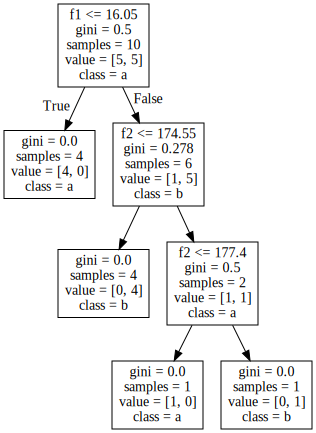

In [21]:
dot_data = tree.export_graphviz(clf3, out_file=None, feature_names=['f1','f2'], class_names=['a','b']) 
graph = graphviz.Source(dot_data)
graph

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

x = [ [1, 183.2],     
      [1, 187.6],
      [1, 177.4],
      [1, 198.6],
      [1, 175.3],
      [1, 151.1],
      [1, 171.4],
      [1, 162.8],
      [1, 179.5],
      [1, 173.8]]
ent = [entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()

TypeError: bad operand type for unary -: 'list'